Saving d.webp to d.webp


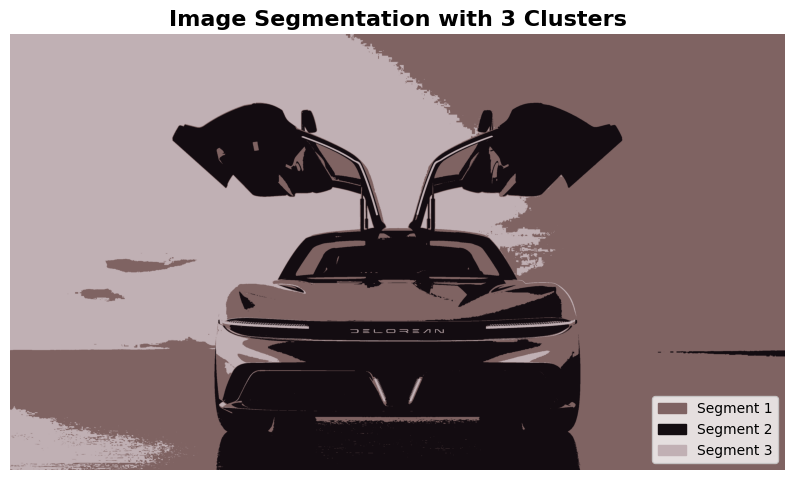

In [13]:
# Unsupervised data
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
#Upload the image
uploaded = files.upload()
image = cv2.imdecode(np.frombuffer(uploaded[next(iter(uploaded))], np.uint8), -1)
# Load and preprocess the image
#image = cv2.imread('WAINAINA.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape
reshaped_image = image.reshape(-1, 3)
# Perform K-Means clustering
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(reshaped_image)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# Create a color-coded segmentation map
segmented_image = centers[labels].reshape(height, width, 3).astype('uint8')
# Create a title for the output
title = f"Image Segmentation with {k} Clusters"
# Define segment labels based on colors
segment_labels = [f"Segment {i+1}" for i in range(k)]
# Visualize the segmented image with title and a legend for colors
plt.figure(figsize=(10, 6))
# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
# Add a title using plt.title
plt.title(title, fontsize=16, fontweight='bold')
# Create a legend for colors
legend_patches = [mpatches.Patch(color=centers[i] / 255, label=segment_labels[i]) for i in range(k)]
plt.legend(handles=legend_patches, loc='lower right')
plt.show()

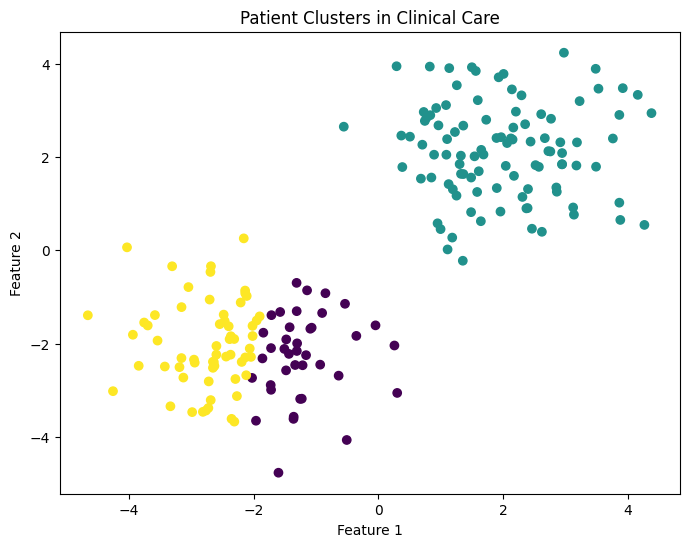

Cluster Centers:
   Feature1  Feature2
0 -1.196694 -2.274325
1  1.999042  2.142779
2 -2.748144 -2.009777


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Generate synthetic patient data
np.random.seed(0)
n_samples = 200
n_features = 2
# Create two distinct patient clusters
cluster1 = np.random.randn(n_samples // 2, n_features) + np.array([2, 2])
cluster2 = np.random.randn(n_samples // 2, n_features) + np.array([-2, -2])
patient_data = np.vstack([cluster1, cluster2])
# Create a DataFrame for visualization
data_df = pd.DataFrame(patient_data, columns=['Feature1', 'Feature2'])
# Standardize the data
scaler = StandardScaler()
patient_data_std = scaler.fit_transform(patient_data)
# Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data_df['Cluster'] = kmeans.fit_predict(patient_data_std)
# Visualize the patient clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_df['Feature1'], data_df['Feature2'], c=data_df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Patient Clusters in Clinical Care')
plt.show()
# Analyze cluster characteristics (e.g., for disease management)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('Cluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Feature1', 'Feature2']))

Saving insurance.csv to insurance.csv


<ipython-input-6-358bf240f1ad>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['charges'], cluster_data[feature_to_cluster], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')


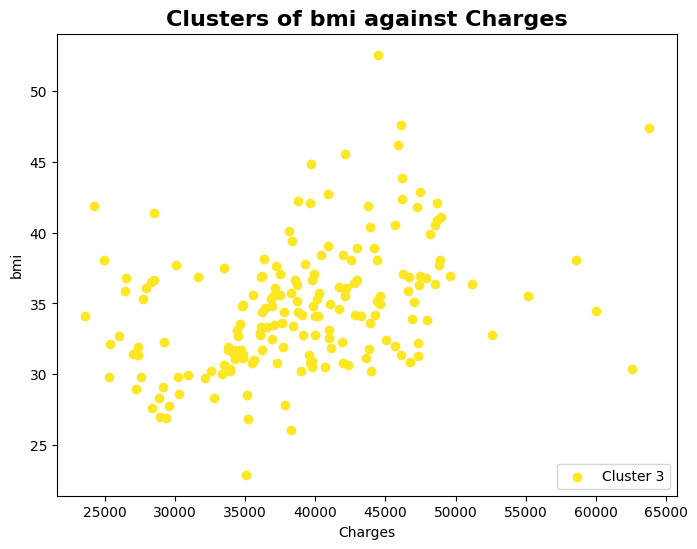

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
# Upload your dataset (CSV file)
uploaded = files.upload() # Allow the user to upload a CSV dataset file interactively
# Read the uploaded CSV file into a DataFrame
for filename in uploaded.keys():
  data = pd.read_csv(filename)
# Read the uploaded CSV file into a DataFrame
# data = pd.read_csv("insurance.csv")
# Define the feature you want to cluster against 'charges'
feature_to_cluster = 'bmi' # Replace with the feature of your choice
# Convert 'smoker' and 'sex' columns to numerical values
label_encoder = LabelEncoder()
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['sex'] = label_encoder.fit_transform(data['sex'])
# Create a feature matrix X
X = data[[feature_to_cluster, 'charges']]
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Apply K-Means clustering
n_clusters = 3 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_std)
# Create a title for the output
title = f'Clusters of {feature_to_cluster} against Charges'
# Visualize the clusters with a legend
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  cluster_data = data[data['Cluster'] == i]
plt.scatter(cluster_data['charges'], cluster_data[feature_to_cluster], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')
plt.xlabel('Charges')
plt.ylabel(feature_to_cluster)
plt.title(title, fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

Saving insurance.csv to insurance (1).csv


<ipython-input-7-3fd3e7bf3ac1>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['charges'], cluster_data[feature_to_cluster], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')


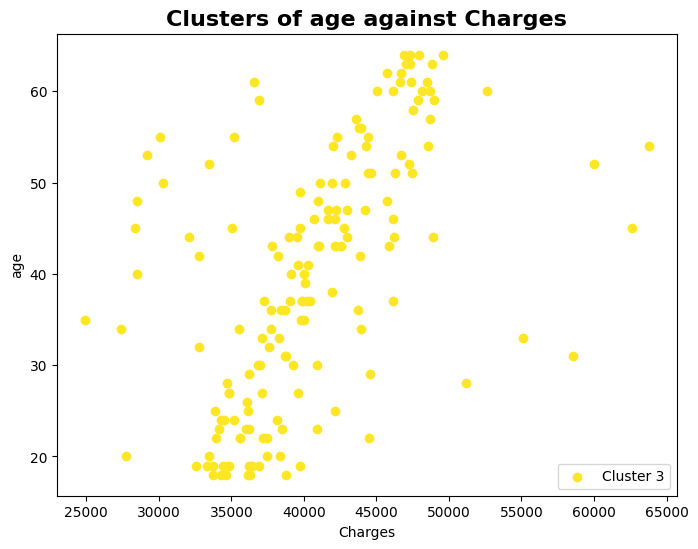

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import joblib

# Upload your dataset (CSV file)
uploaded = files.upload() # Allow the user to upload a CSV dataset file interactively

# Read the uploaded CSV file into a DataFrame
for filename in uploaded.keys():
  data = pd.read_csv(filename)

# Define the feature you want to cluster against 'charges'
feature_to_cluster = 'age' # Replace with the feature of your choice

# Convert 'smoker' and 'sex' columns to numerical values
label_encoder = LabelEncoder()
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['sex'] = label_encoder.fit_transform(data['sex'])

# Create a feature matrix X
X = data[[feature_to_cluster, 'charges']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply K-Means clustering
n_clusters = 3 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_std)

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Create a title for the output
title = f'Clusters of {feature_to_cluster} against Charges'

# Visualize the clusters with a legend
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  cluster_data = data[data['Cluster'] == i]
plt.scatter(cluster_data['charges'], cluster_data[feature_to_cluster], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')
plt.xlabel('Charges')
plt.ylabel(feature_to_cluster)
plt.title(title, fontsize=16, fontweight='bold')
plt.legend(loc='lower right')

# Save the plot
plt.savefig('cluster_plot.png')

# Show the plot
plt.show()

<ipython-input-12-e999728c95c9>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['charges'], cluster_data['age'], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')


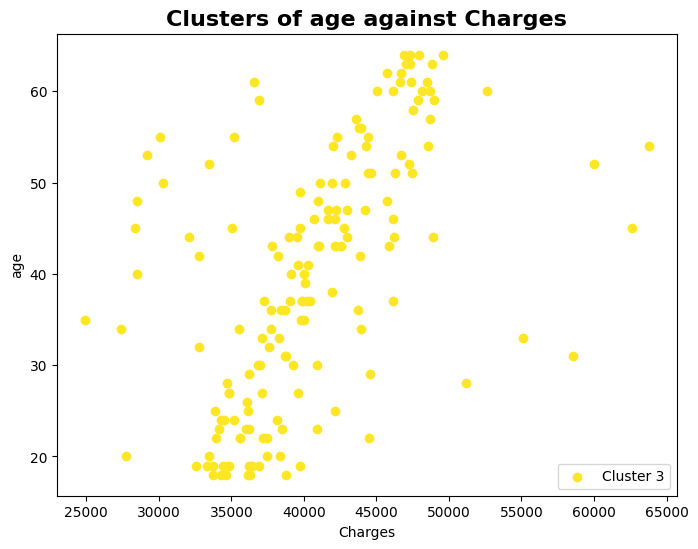

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import joblib

# Function to preprocess the data
def preprocess_data(data):
  label_encoder = LabelEncoder()
  data['smoker'] = label_encoder.fit_transform(data['smoker'])
  data['sex'] = label_encoder.fit_transform(data['sex'])
  X = data[['age', 'charges']]
  scaler = StandardScaler()
  X_std = scaler.fit_transform(X)
  return X_std

# Function to visualize the clusters
def visualize_clusters(data, kmeans_model):
  n_clusters = len(np.unique(kmeans_model.labels_))
title = 'Clusters of age against Charges'

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  cluster_data = data[data['Cluster'] == i]
plt.scatter(cluster_data['charges'], cluster_data['age'], c=plt.cm.viridis(i / (n_clusters - 1)), label=f'Cluster {i+1}')
plt.xlabel('Charges')
plt.ylabel('age')
plt.title(title, fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

# Load the saved KMeans model
model_file = 'kmeans_model.pkl'
kmeans_model = joblib.load(model_file)

# Create a new DataFrame with different data (replace this with your new data)
# For demonstration, I'm creating a random DataFrame here
new_data = pd.DataFrame({
'age': np.random.randint(18, 70, size=100),
'charges': np.random.uniform(1000, 50000, size=100),
'smoker': np.random.choice(['yes', 'no'], size=100),
'sex': np.random.choice(['male', 'female'], size=100)
})

# Preprocess the new data
new_data_std = preprocess_data(new_data)

# Predict clusters for the new data
new_data['Cluster'] = kmeans_model.predict(new_data_std)

# Visualize the clusters
visualize_clusters(new_data, kmeans_model)

